# Effects of Loan Features on Borrower APR


## Investgation Overview

In this investigation, I wanted to look at the features that may affect the APR.  The main focus was on term, Prosper rating, loan original amount, current delinquencies, employment status and loan status.

## Dataset Overview

The original data set from Prosper contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

To make it clear, I've only selected 11 features that may be related to the question I'm interested in, which is what affect the borrower APR.(Term, LoanStatus, BorrowerAPR, BorrowerRate, ProsperRating(numeric), EmploymentStatus, EmploymentStatusDuration, StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanPayment, CurrentDelinquencies)

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [21]:
# load in the dataset 
df = pd.read_csv('prosperLoanData.csv')

In [22]:
# some of the columns were not available before July 2009, only select the observations after that
df = df[(df['ListingCreationDate'] >= '2009-07-01')]

In [23]:
# pick 11 variables that seem worth exploring
column_sub = ['Term','LoanStatus','BorrowerAPR','BorrowerRate',
'ProsperRating (numeric)','EmploymentStatus','EmploymentStatusDuration','StatedMonthlyIncome',
'LoanOriginalAmount','MonthlyLoanPayment','CurrentDelinquencies']
df_new = df[column_sub]

In [24]:
df_new.to_csv('df_new.csv',index=False)

In [25]:
df_new = pd.read_csv('df_new.csv')

In [26]:
# print the overview of the new dataset 
print(df_new.shape)
print(df_new.dtypes)
print(df_new.info())

(84853, 11)
Term                          int64
LoanStatus                   object
BorrowerAPR                 float64
BorrowerRate                float64
ProsperRating (numeric)     float64
EmploymentStatus             object
EmploymentStatusDuration    float64
StatedMonthlyIncome         float64
LoanOriginalAmount            int64
MonthlyLoanPayment          float64
CurrentDelinquencies        float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 11 columns):
Term                        84853 non-null int64
LoanStatus                  84853 non-null object
BorrowerAPR                 84853 non-null float64
BorrowerRate                84853 non-null float64
ProsperRating (numeric)     84853 non-null float64
EmploymentStatus            84853 non-null object
EmploymentStatusDuration    84834 non-null float64
StatedMonthlyIncome         84853 non-null float64
LoanOriginalAmount          84853 non-null int64
MonthlyLoanPayme

In [27]:
df_new.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,CurrentDelinquencies
0,36,Current,0.12016,0.0920,6.0,Employed,44.0,6125.000000,10000,318.93,0.0
1,36,Current,0.12528,0.0974,6.0,Employed,113.0,2875.000000,10000,321.45,4.0
2,36,Current,0.24614,0.2085,3.0,Employed,44.0,9583.333333,15000,563.97,0.0
3,60,Current,0.15425,0.1314,5.0,Employed,82.0,8333.333333,15000,342.37,0.0
4,36,Current,0.31032,0.2712,2.0,Employed,172.0,2083.333333,3000,122.67,0.0


In [28]:
# convert LoanStatus and ProsperRating into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Chargedoff', 'Cancelled', 'Defaulted', 'PastDue', 'Current', 'FinalPaymentInProgress', 'Completed'],
                    'ProsperRating (numeric)': [1,2,3,4,5,6,7]
                    ,'Term':[12,36,60]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_new[var] = df_new[var].astype(ordered_var)

## Distribution of APR and BorrowerRate
The borrower APR and interest rate have similar distribution, they are both generally one modal with low skewness. But APR includes other fees like origination and check fee, that's why the distribution spreads wider.
<br /><br />There's one bin with over 7000 listings appear on the right side, which will be explained in the following exploration.


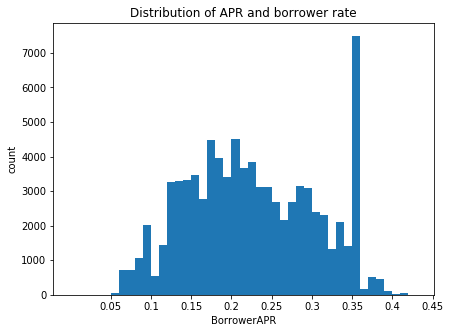

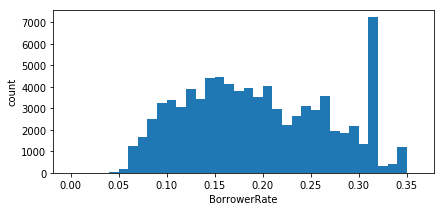

In [29]:
# plotting APR and BorrowerRate on standard scale
binsize = 0.01
APR_bins = np.arange(0, df_new['BorrowerAPR'].max()+binsize, binsize)
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
plt.hist(data = df_new, x = 'BorrowerAPR', bins = APR_bins)
plt.xlabel('BorrowerAPR')
x_ticks = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
plt.xticks(x_ticks,x_ticks)
plt.ylabel('count')
plt.title('Distribution of APR and borrower rate');

binsize = 0.01
Rate_bins = np.arange(0, df_new['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[15, 3])
plt.subplot(1,2,2)
plt.hist(data = df_new, x = 'BorrowerRate', bins = Rate_bins)
plt.xlabel('BorrowerRate')
plt.ylabel('count');




## Distribution of Term
There are only three terms available for the borrowers,12,36 months and 60 months.<br />
We can see most users go for 36 or 60 months for the loan term.

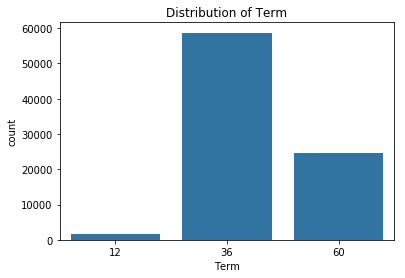

In [30]:
# plotting term on standard scale
base_color=sb.color_palette()[0]
sb.countplot(data=df_new,x='Term',color=base_color)
plt.title('Distribution of Term');

## Distribution of Prosper rating and Loan status
The distribution of prosper rating is quite close to normal distribution,the highest count is rating 4 and gradually decrease as the ratings go higher or lower.
<br />The second chart shows the loan status, most of the loans are now current or completed, although there are still some being defaulted or chargedoff.

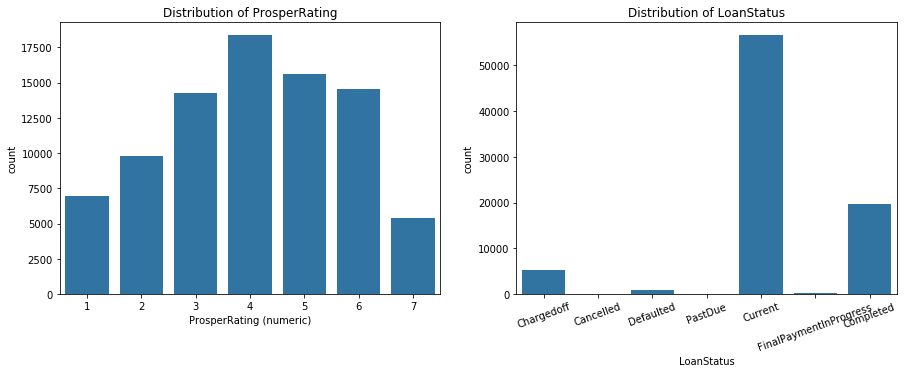

In [31]:
# plotting ProsperRating and LoanStatus on standard scale
fig, ax = plt.subplots(ncols=2, figsize = [15,5])
base_color = sb.color_palette()[0]
plt.xticks(rotation=20)

sb.countplot(data = df_new, x = 'LoanStatus', color = base_color, ax = ax[1])
ax[1].set_title('Distribution of LoanStatus')
sb.countplot(data = df_new, x = 'ProsperRating (numeric)', color = base_color, ax = ax[0])
ax[0].set_title('Distribution of ProsperRating');


In [32]:
# sort all the variable into two two groups
numeric_vars = ['BorrowerAPR','BorrowerRate',
               'EmploymentStatusDuration','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','CurrentDelinquencies']
categoric_vars = ['Term','LoanStatus','ProsperRating (numeric)','EmploymentStatus']

## APR vs. ProsperRating
An obvious negative relationship can be found in this point plot, as the rating goes higher the APR goes lower.

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


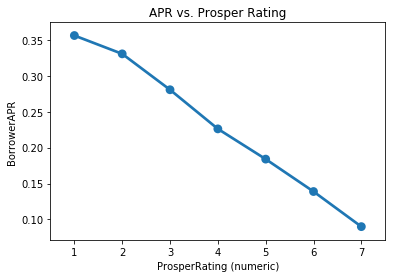

In [33]:
# APR vs. Prosper rating
sb.pointplot(data=df_new,x='ProsperRating (numeric)',y='BorrowerAPR')
plt.title('APR vs. Prosper Rating');

## APR vs. Prosper Rating vs. Loan Status
We've found the strong relationship between APR and the prosper rating, now I want to see if loan status like defaulted or charged off have worse rate.<br />
Looking firstly at the x axis of this heat map, overall current loan does have slightly lighter color(lower APR) than Defaulted and Chargeddoff. 
<br /> The effect for the prosper rating is more evident, regardless of the loan stauts , the lower the rating the deeper color.(higher APR)


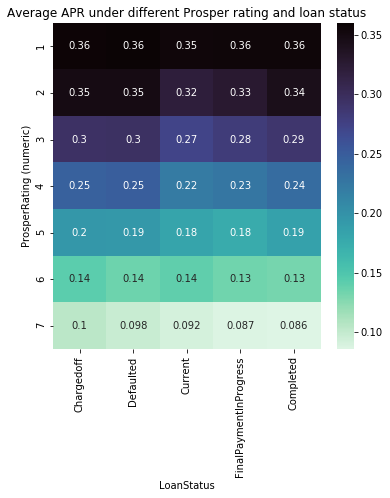

In [34]:
# LoanStatus vs. ProsperRating vs. BorrowerAPR
APR_mean = df_new.groupby(['LoanStatus','ProsperRating (numeric)']).mean()['BorrowerAPR']
APR_mean = APR_mean.reset_index(name='Average APR')
APR_mean = APR_mean.dropna()
APR_mean = APR_mean.pivot(index='ProsperRating (numeric)',columns='LoanStatus',values='Average APR')


plt.figure(figsize = [6, 6])
sb.heatmap(APR_mean,annot=True,cmap='mako_r')
plt.title('Average APR under different Prosper rating and loan status');


## APR vs. Prosper Rating vs.Term
On the violin plot, we can see that longer term like 60 months does not get higher APR for its risk, and the average rate it's even lower than the 36 month.<br /><br /> 
Turning to the right side of the chart, this "longer term lower rate" trend only appear before **level 4**, ratings after that get higher APR for longer periods.<br />
<br /> 
Also, I presume the peak(around 0.36) and the high amount of 36 months loan is the reason why the APR has an extremely high spike on the right side of the distribution.

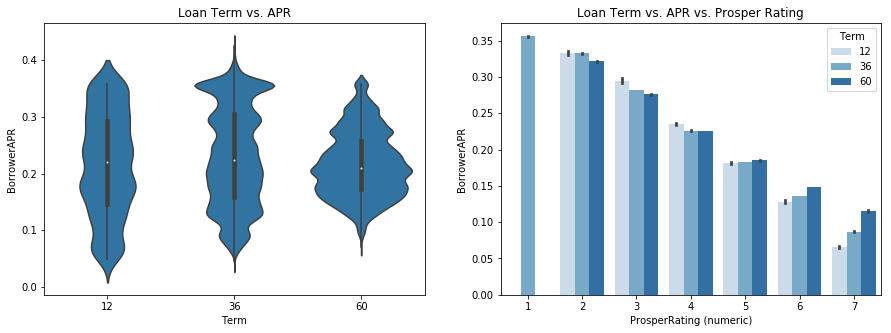

In [35]:
# APR vs. Proser Rating vs. Term
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.violinplot(data = df_new, x = 'Term', y = 'BorrowerAPR', color = base_color)
plt.title('Loan Term vs. APR')
plt.subplot(1,2,2)
sb.barplot(data = df_new, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'Term',palette='Blues')
plt.title('Loan Term vs. APR vs. Prosper Rating');

## APR vs. ProsperRating vs. EmploymentStatus vs. Term
Looking firstly at the right side of the plot, most of unemployed borrowers have higher rate for longer term,<br /> this is also the case for the left side plot after rating4,while there's an opposite pattern from rating 1-4.<br />
This means employed borrowers but low-rated customers tend to get higher rates for shorter period, and unemployed custormers get a much higher rate for longer period.<br />
<br />
Another worth noting thing is that on the both side of the chart the APR decreases as the Prosper rating goes higher.

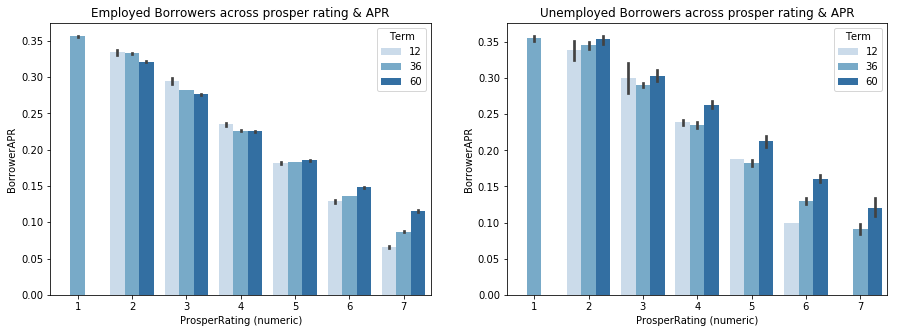

In [36]:
# APR vs. ProsperRating vs. EmploymentStatus vs. Term
df_em = (df_new['EmploymentStatus'] == "Employed") | (df_new['EmploymentStatus'] == "Full-time") | (df_new['EmploymentStatus'] == "Self-employed")
df_em = df_new.loc[df_em,:]

df_unem = (df_new['EmploymentStatus'] == "Not employed") | (df_new['EmploymentStatus'] == "Retired")
df_unem = df_new.loc[df_unem,:]

plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
g = sb.barplot(data = df_em, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'Term',palette='Blues')
plt.title('Employed Borrowers across prosper rating & APR')

plt.subplot(1,2,2)
g = sb.barplot(data = df_unem, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'Term',palette='Blues')
plt.legend(loc=1,title='Term')
plt.title('Unemployed Borrowers across prosper rating & APR');


## APR vs. Sampled CurrentDelinquencies vs. EmploymentStatus 
Surprisingly, the number of delinquencies of employed and unemployed borrowers look more or less the same, and actually the average delinqency of employed group is slightly higher than the unemployed one.
 But the dots on the unemployed side are more dense on the higher APR end, while on the employed side they spread more evenly.

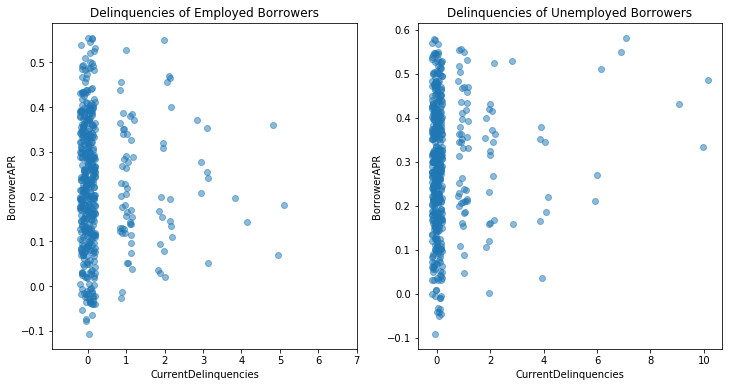

In [37]:
#Sampled CurrentDelinquencies vs. EmploymentStatus vs. BorrowerAPR
em_samp = df_new[(df_new['EmploymentStatus'] == "Employed") | (df_new['EmploymentStatus'] == "Full-time") | (df_new['EmploymentStatus'] == "Self-employed")]
unem_samp = df_new[(df_new['EmploymentStatus'] == "Not employed") | (df_new['EmploymentStatus'] == "Retired")]
em_samp = em_samp.reset_index()
unem_samp = unem_samp.reset_index()

em_samples = np.random.choice(em_samp.shape[0], 500, replace = False)
em_samp = em_samp.loc[em_samples,:]

unem_samples = np.random.choice(unem_samp.shape[0], 500, replace = False)
unem_samp = unem_samp.loc[unem_samples,:]

plt.figure(figsize = [12, 6])
plt.subplot(1, 2, 1)
sb.regplot(data = em_samp, x = 'CurrentDelinquencies',y='BorrowerAPR',fit_reg=False,scatter_kws={'alpha':0.5},x_jitter=0.2,y_jitter=0.2)
plt.xlim(right=7)
plt.title('Delinquencies of Employed Borrowers')


plt.subplot(1, 2, 2)
sb.regplot(data = unem_samp, x = 'CurrentDelinquencies',y='BorrowerAPR',fit_reg=False,scatter_kws={'alpha':0.5},x_jitter=0.2,y_jitter=0.2)
plt.title('Delinquencies of Unemployed Borrowers');



## Conclusion
The Prosper rating is the factor that affect the APR the most, <br />
but effect may differ in different terms and employment status, like the employed low rating group has an opposite pattern than others.
Also, the effect can be stronger when it's combined with a longer period.
<br /> <br />
There's also a relationship between loan status and APR, the status like defaulted and charged off do have a higher APR, and again the effect is stronger when the loan is given a low rating.
<br /> <br />
Lastly, we see the employment status affect the number of delinqency is not the case, but the employment status can influence the APR. 